# Decession Tree Classifier Urban or Not Urban

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## Import the Dataset

In [2]:
df=pd.read_csv("Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Exploration

## Summary of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Descriptive Summary of Data

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Shape of Dataset

In [5]:
df.shape

(400, 11)

## Check if there were any Null Values

In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Check if any duplicate values were Present

In [7]:
df.duplicated().sum()

0

# Feature Engineering

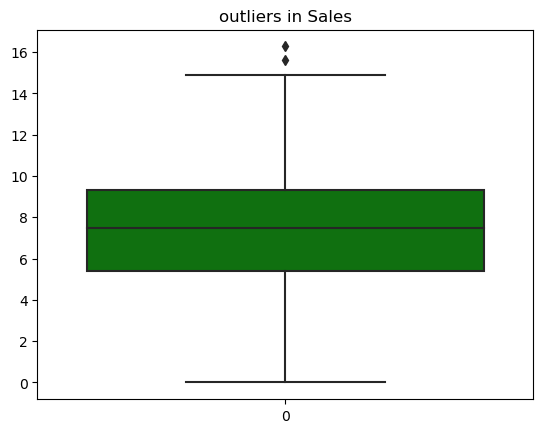

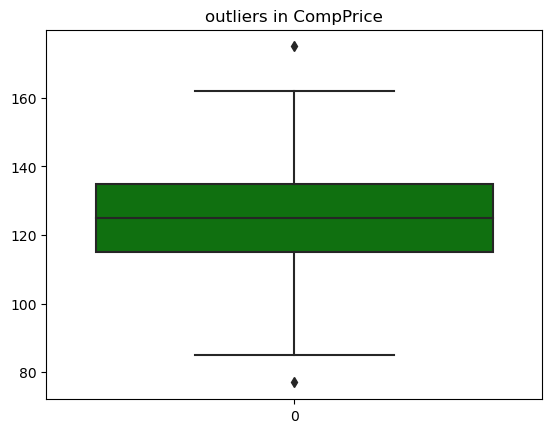

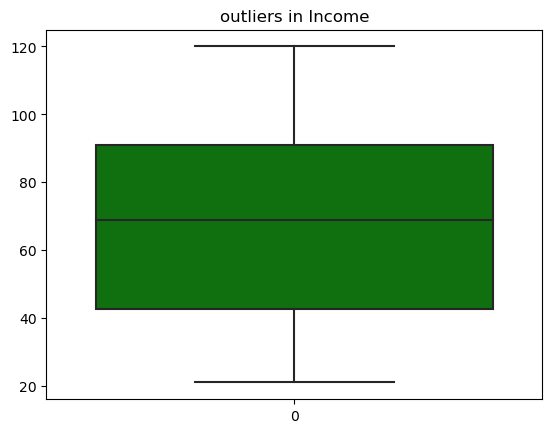

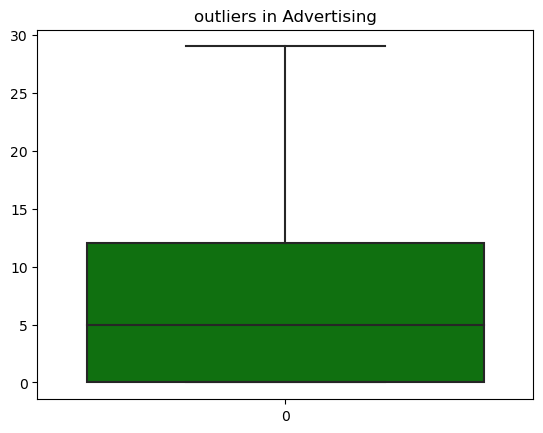

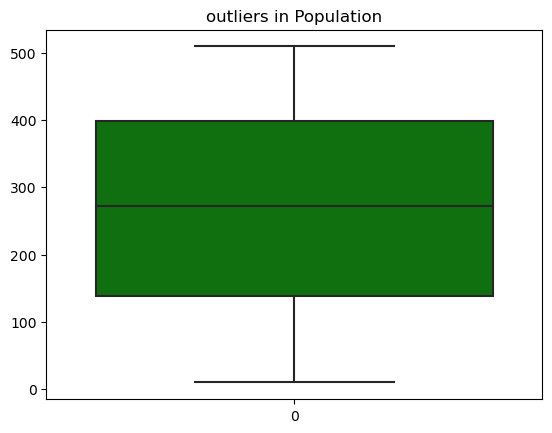

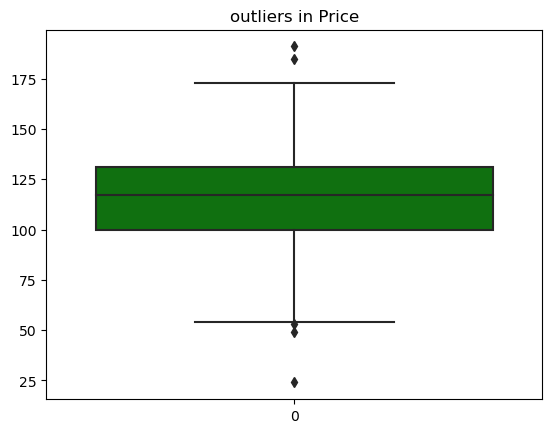

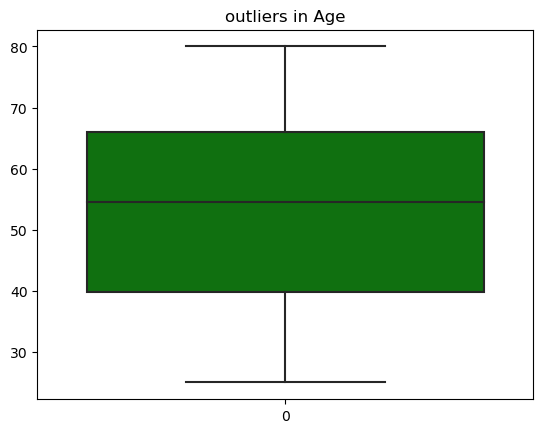

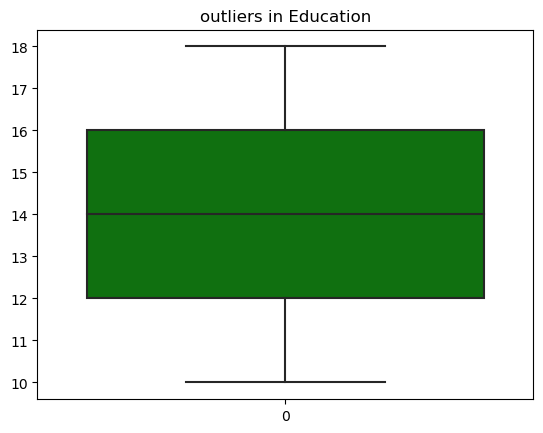

In [8]:
for i in df.columns:
    if i not in ["ShelveLoc","Urban","US"]:
        sns.boxplot(df[i],color="g")
        plt.title("outliers in "+i)
        plt.show()

### Observations:
- There were few Outliers in Sales, CompPrice and Price

## Remove the outliers

In [9]:
outliers=["Sales","CompPrice","Price"]

In [10]:
for i in outliers:
    minimum,q1,middle,q3,maximum=np.quantile(df[i],[0,0.25,0.50,0.75,1])
    IQR=q3-q1
    lower_fence=q1-(IQR*1.5)
    higher_fence=q3+(IQR*1.5)
    print("In "+i+" Column any values beyond the Range "+str(lower_fence)+" and "+str(higher_fence)+" are outliers")

In Sales Column any values beyond the Range -0.504999999999999 and 15.215 are outliers
In CompPrice Column any values beyond the Range 85.0 and 165.0 are outliers
In Price Column any values beyond the Range 53.5 and 177.5 are outliers


### Filter Outliers in Sales column

In [11]:
df=df[df["Sales"]<=15.215]

In [12]:
df.shape

(398, 11)

### Filter CompPrice Column

In [13]:
df=df[(df["CompPrice"]>=85.0) & (df["CompPrice"]<=165.0)]

In [14]:
df.shape

(396, 11)

### Filter in Price column

In [15]:
df=df[(df["Price"]>=53.5) & (df["Price"]<=177.5)]

In [16]:
df.shape

(392, 11)

In [17]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

## View Data Distribution of all the features

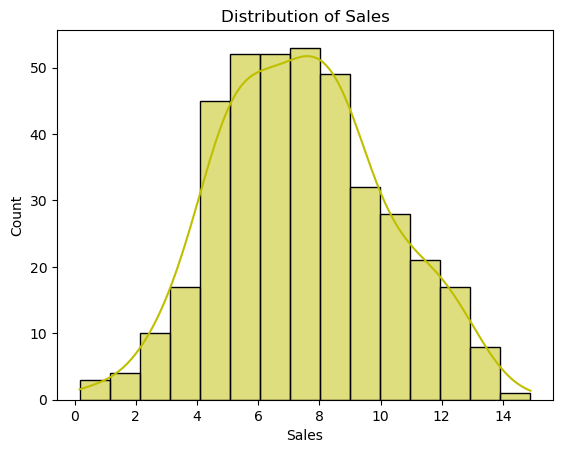

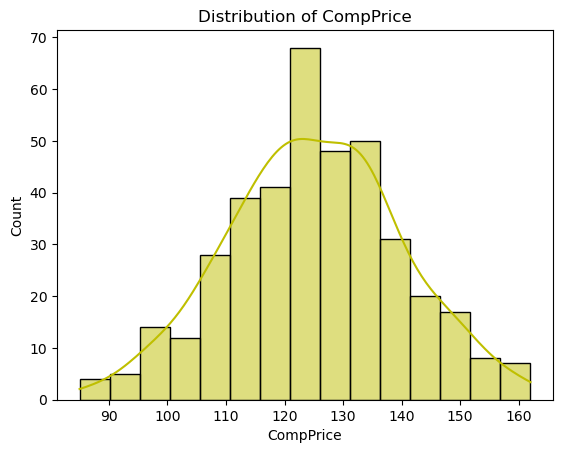

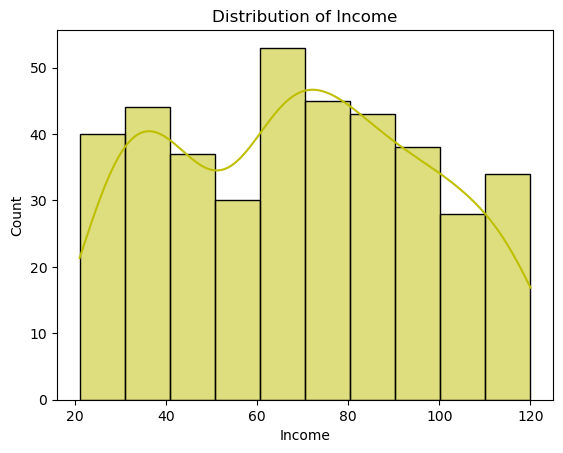

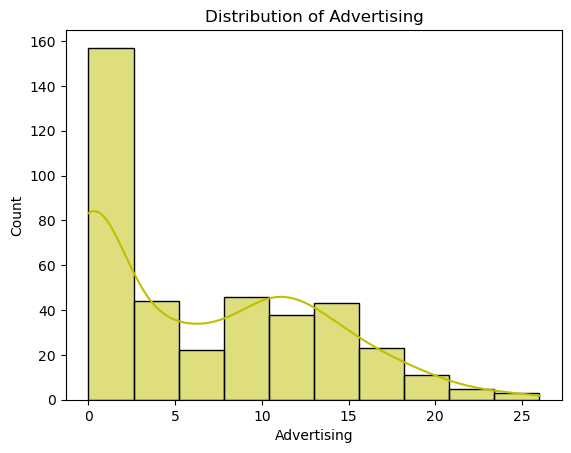

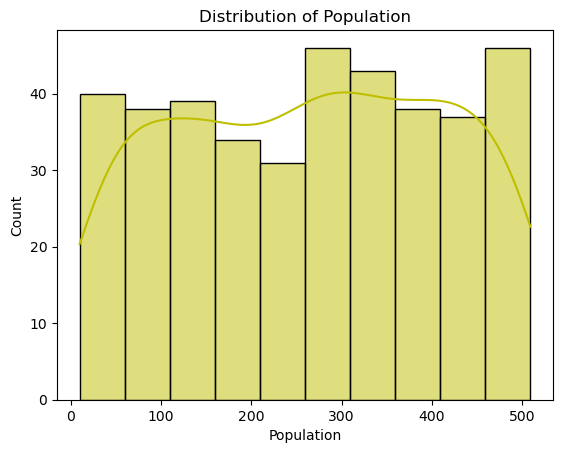

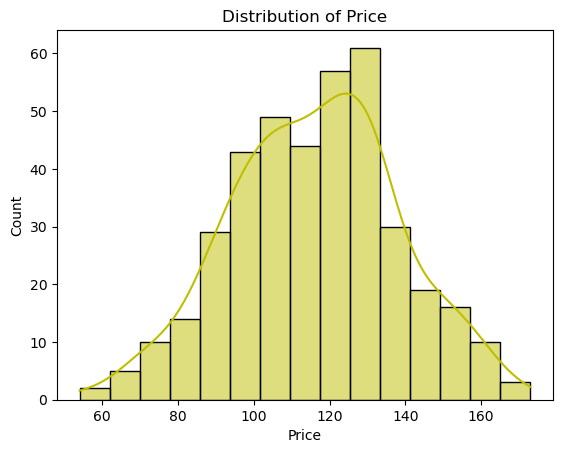

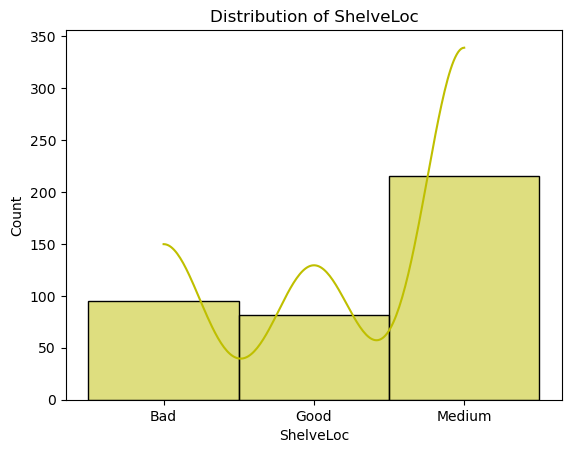

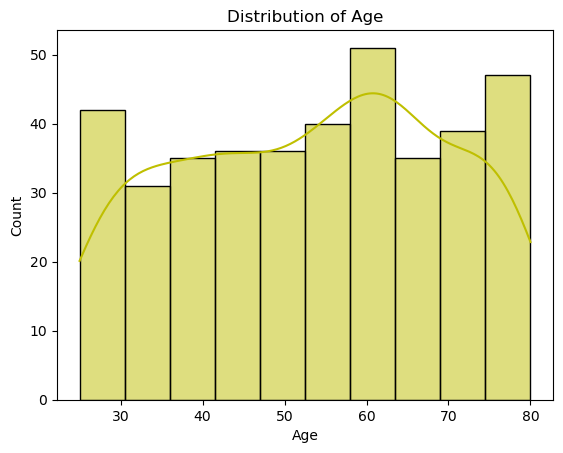

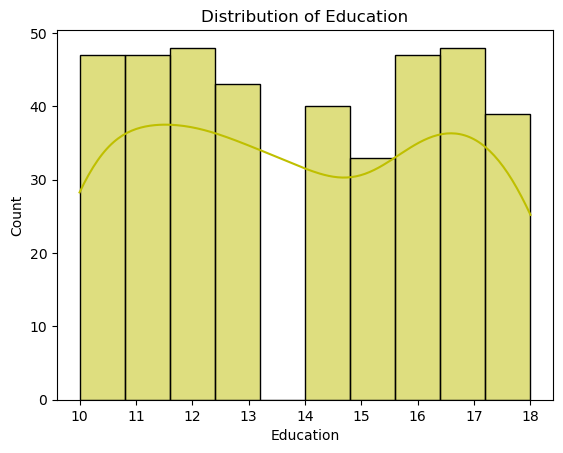

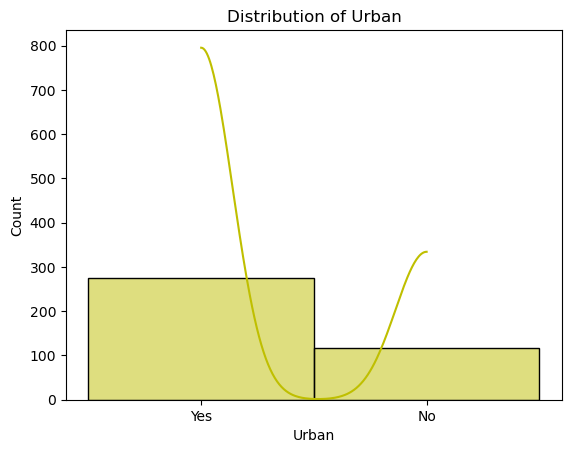

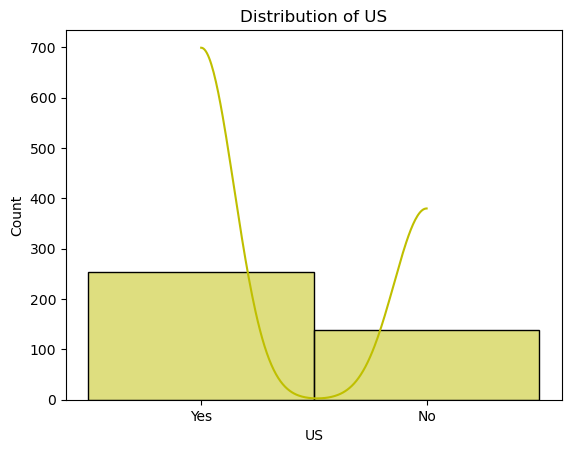

In [18]:
for i in df.columns:
    sns.histplot(df[i],kde=True,color="y")
    plt.title("Distribution of "+i)
    plt.show()

### Observations:
- Sales , CompPrice and Price were normally Distributed.
- Advertising is Right Skewed

Decoding Features

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()

In [21]:
df["ShelveLoc"]=encoder.fit_transform(df["ShelveLoc"])

In [22]:
df["US"]=encoder.fit_transform(df["US"])

In [23]:
df["Urban_c"]=encoder.fit_transform(df["Urban"])

In [24]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,9.50,138,73,11,276,120,0,42,17,Yes,1,1
1,11.22,111,48,16,260,83,1,65,10,Yes,1,1
2,10.06,113,35,10,269,80,2,59,12,Yes,1,1
3,7.40,117,100,4,466,97,2,55,14,Yes,1,1
4,4.15,141,64,3,340,128,0,38,13,Yes,0,1


# Feature Coreleations

<AxesSubplot: >

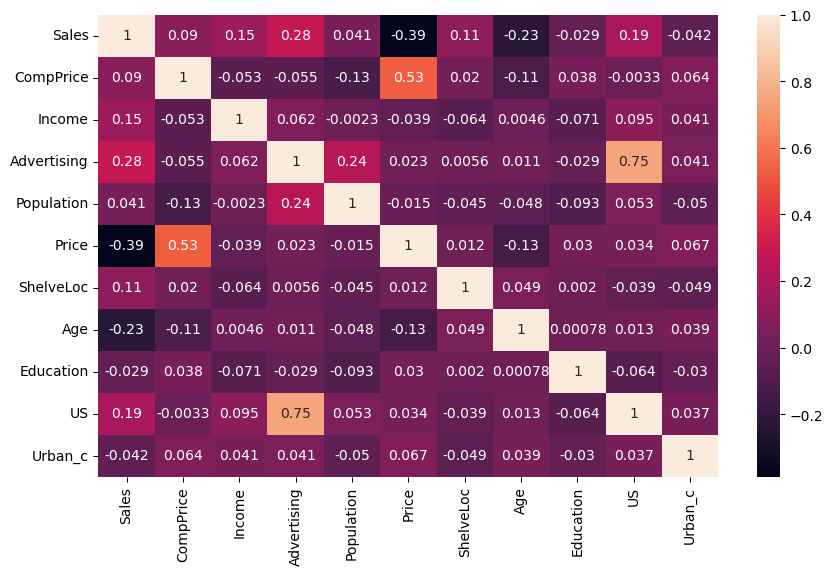

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method="spearman"),annot=True)

# Checking and Handling Imbalanced Dataset

In [26]:
from sklearn.utils import resample

In [27]:
major=df[df["Urban"]=="Yes"]

In [28]:
major.shape

(276, 12)

In [29]:
minor=df[df["Urban"]=="No"]

In [30]:
minor.shape

(116, 12)

In [31]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

In [32]:
minor_new.shape

(276, 12)

In [33]:
df=pd.concat([minor_new,major])

In [34]:
df.shape

(552, 12)

In [35]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
349,9.32,134,27,18,467,96,2,49,14,No,1,0
158,12.53,142,90,1,189,112,1,39,10,No,1,0
299,9.40,135,40,17,497,96,2,54,17,No,1,0
46,12.44,127,90,14,16,70,2,48,15,No,1,0
360,8.77,118,86,7,265,114,1,52,15,No,1,0


In [36]:
df=df.sample(frac=1)

In [37]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
35,11.07,131,84,11,29,96,2,44,17,No,1,0
281,11.19,122,69,7,303,105,1,45,16,No,1,0
281,11.19,122,69,7,303,105,1,45,16,No,1,0
100,4.11,113,69,11,94,106,2,76,12,No,1,0
224,4.10,134,82,0,464,141,2,48,13,No,0,0


In [38]:
df.reset_index(inplace=True)

In [39]:
df.head()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,35,11.07,131,84,11,29,96,2,44,17,No,1,0
1,281,11.19,122,69,7,303,105,1,45,16,No,1,0
2,281,11.19,122,69,7,303,105,1,45,16,No,1,0
3,100,4.11,113,69,11,94,106,2,76,12,No,1,0
4,224,4.10,134,82,0,464,141,2,48,13,No,0,0


In [40]:
df.drop("index",axis=1,inplace=True)

In [41]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,11.07,131,84,11,29,96,2,44,17,No,1,0
1,11.19,122,69,7,303,105,1,45,16,No,1,0
2,11.19,122,69,7,303,105,1,45,16,No,1,0
3,4.11,113,69,11,94,106,2,76,12,No,1,0
4,4.10,134,82,0,464,141,2,48,13,No,0,0


In [42]:
df.shape

(552, 12)

# Spliting Independent and Dependent Features

In [43]:
x=df.drop(["Urban","Urban_c"],axis=1)

In [44]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US
0,11.07,131,84,11,29,96,2,44,17,1
1,11.19,122,69,7,303,105,1,45,16,1
2,11.19,122,69,7,303,105,1,45,16,1
3,4.11,113,69,11,94,106,2,76,12,1
4,4.10,134,82,0,464,141,2,48,13,0


In [45]:
y=df["Urban"]

In [46]:
y

0       No
1       No
2       No
3       No
4       No
      ... 
547    Yes
548     No
549     No
550     No
551    Yes
Name: Urban, Length: 552, dtype: object

## Scaling the Independent Features

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()

In [49]:
x_new=scaler.fit_transform(x)

In [50]:
x=pd.DataFrame(x_new,columns=x.columns)

In [51]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US
0,1.200794,0.420081,0.487168,0.614421,-1.579880,-0.819685,0.760767,-0.541800,1.175156,0.739066
1,1.243861,-0.219895,-0.027801,0.010395,0.203689,-0.410172,-0.467138,-0.482080,0.789721,0.739066
2,1.243861,-0.219895,-0.027801,0.010395,0.203689,-0.410172,-0.467138,-0.482080,0.789721,0.739066
3,-1.297097,-0.859871,-0.027801,0.614421,-1.156771,-0.364671,0.760767,1.369212,-0.752016,0.739066
4,-1.300686,0.633406,0.418505,-1.046650,1.251699,1.227879,0.760767,-0.302923,-0.366582,-1.353059


In [52]:
y=df["Urban"]

In [53]:
y

0       No
1       No
2       No
3       No
4       No
      ... 
547    Yes
548     No
549     No
550     No
551    Yes
Name: Urban, Length: 552, dtype: object

# Split the Training and Testing Data

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [55]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((414, 10), (414,), (138, 10), (138,))

# Build the Model

In [56]:
model=DecisionTreeClassifier()

In [57]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

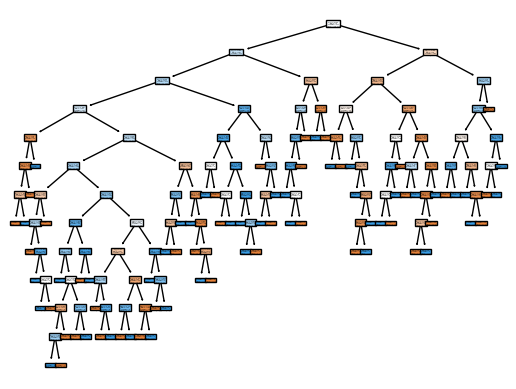

In [58]:
tree.plot_tree(model,filled=True)
plt.show()

In [59]:
y_pred=model.predict(x_test)

In [60]:
y_pred

array(['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes'], dtype=object)

## Measure the metrics

Text(50.722222222222214, 0.5, 'Predicted')

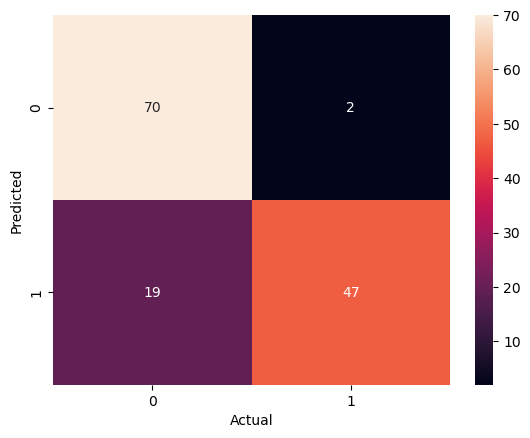

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.79      0.97      0.87        72
         Yes       0.96      0.71      0.82        66

    accuracy                           0.85       138
   macro avg       0.87      0.84      0.84       138
weighted avg       0.87      0.85      0.84       138



# Hyperparameter Tuning

In [63]:
grid={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[11,12,13],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [64]:
clf=GridSearchCV(model,param_grid=grid,cv=5)

In [65]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [66]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'splitter': 'best'}

In [69]:
model=DecisionTreeClassifier(criterion="gini",max_depth=13,max_features="auto",splitter="best")

In [70]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, max_features='auto')

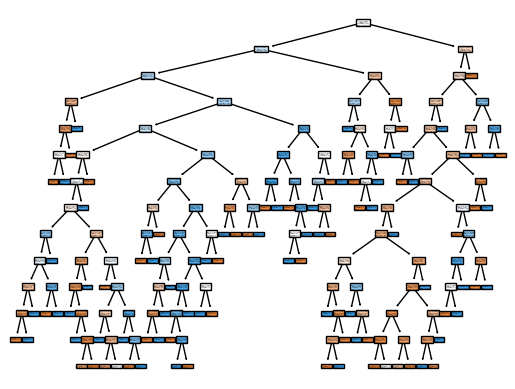

In [71]:
tree.plot_tree(model,filled=True)
plt.show()

In [72]:
y_pred=model.predict(x_test)

In [73]:
y_pred

array(['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No'], dtype=object)

Text(50.722222222222214, 0.5, 'Predicted')

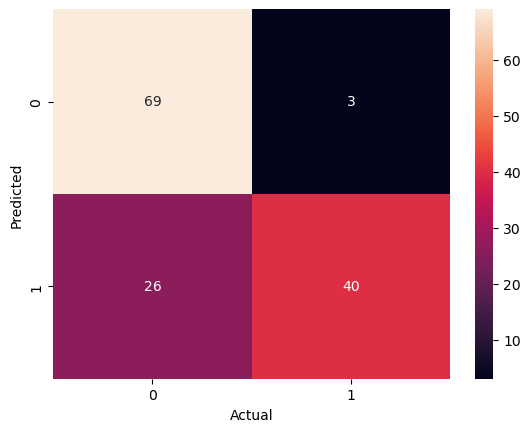

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.73      0.96      0.83        72
         Yes       0.93      0.61      0.73        66

    accuracy                           0.79       138
   macro avg       0.83      0.78      0.78       138
weighted avg       0.82      0.79      0.78       138



# Observation:
- Default model has given us better results than HyperParameter Tuning

In [76]:
model=DecisionTreeClassifier()

In [77]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred=model.predict(x_test)

In [80]:
y_pred

array(['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes'], dtype=object)

Text(50.722222222222214, 0.5, 'Predicted')

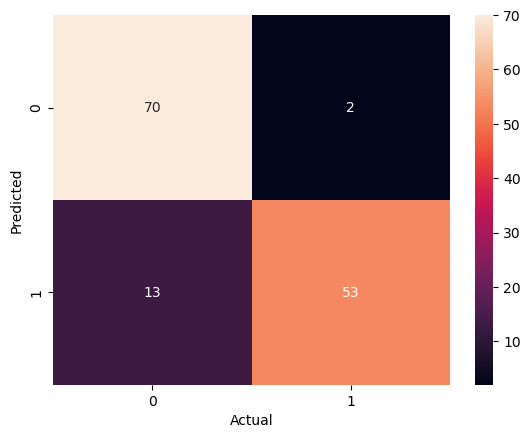

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")